In [60]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import time
from cliff_walking_org import CliffWalkingEnv
import random
import seaborn as sns

In [2]:
class Agent(object):

    def __init__(self, env, policy, gamma, temp, alpha, epsilon=0.1):
        self.env = env
        self.Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        self.temp = temp
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        if policy == 'Boltzmann_Exploration':
            self.policy = self.Boltzmann_Exploration
        elif policy == 'egreedy_policy':
            self.policy = self.egreedy_policy
        #np.random.seed(seed=1)
        
    def Boltzmann_Exploration(self, Q_val):
        prob = np.exp(Q_val / self.temp) / np.sum(np.exp(Q_val / self.temp))
        action = np.random.choice(len(Q_val), 1, p=prob)[0]
        return action, prob
    
#     def egreedy_policy(self, Q_val):
#         if np.random.random() < self.epsilon:
#             return np.random.choice(self.env.action_space.n),_
#         else:
#             return np.argmax(Q_val),_

#     def egreedy_policy(self, Q_val):
#         A = np.ones(self.env.action_space.n, dtype=float) * self.epsilon / self.env.action_space.n
#         best_action = np.argmax(Q_val)
#         A[best_action] += (1.0 - self.epsilon)
#         return A

        
    def Qlearning(self, episodes):
        rewards = []
        for episode in range(episodes):
            # initialize state,S
            state = self.env.reset()
            done = False
            episodic_reward = 0
            # Repeat for each step of episode
            while not done:
                # Choose action: Use Boltzmann_Exploration
                action, _ = self.policy(self.Q[state, :])
                #action, _ = self.Boltzmann_Exploration(self.Q[state, :])
                #action = self.egreedy_policy(self.Q[state, :])
            
                
                next_state, reward, done, _ = self.env.step(action)
                # compute TD target:
                td_target = reward + self.gamma * np.max(self.Q[next_state, :])
                td_error = td_target - self.Q[state, action]
                # Q update
                self.Q[state, action] = self.Q[state, action] + self.alpha * td_error
                # s'=s
                state = next_state
                episodic_reward += reward

            rewards.append(episodic_reward)
        return rewards, self.Q
    
    def SARSA(self, episodes):
        rewards = []
        for episode in range(episodes):
            # initialize state,S
            state = self.env.reset()
            done = False
            episodic_reward = 0
            # Choose action: Use Boltzmann_Exploration
            action, _ = self.policy(self.Q[state, :])
            #action, _ = self.Boltzmann_Exploration(self.Q[state, :])
            #action = self.egreedy_policy(self.Q[state, :])

            # Repeat for each step of episode
            while not done:
                next_state, reward, done, _ = self.env.step(action)
                # compute TD target:
                next_action,_ = self.policy(self.Q[next_state, :])
                #next_action,_ = self.Boltzmann_Exploration(self.Q[next_state, :])
                #next_action = self.egreedy_policy(self.Q[next_state, :])

                td_target=reward + self.gamma*self.Q[next_state,next_action]
                td_error = td_target - self.Q[state, action]
                # Q update
                self.Q[state, action] = self.Q[state, action] + self.alpha * td_error
                # s'=s
                state = next_state
                # a'=a
                action = next_action
                episodic_reward += reward

            rewards.append(episodic_reward)
        return rewards, self.Q
    
    def Expected_SARSA(self, episodes):
        rewards = []
        for episode in range(episodes):
            # initialize state,S
            state = self.env.reset()
            done = False
            episodic_reward = 0
            # Choose action: Use Boltzmann_Exploration
            #action, _ = self.Boltzmann_Exploration(self.Q[state, :])
            action, _ = self.policy(self.Q[state, :])


            # Repeat for each step of episode
            while not done:
                next_state, reward, done, _ = self.env.step(action)
                # compute TD target:
                #next_action, prob = self.Boltzmann_Exploration(self.Q[next_state, :])
                next_action, prob = self.policy(self.Q[next_state, :])

                td_target=reward + self.gamma*np.sum(prob*self.Q[next_state,:])
                td_error = td_target - self.Q[state, action]
                # Q update
                self.Q[state, action] = self.Q[state, action] + self.alpha * td_error
                # s'=s
                state = next_state
                # a'=a
                action = next_action
                episodic_reward += reward

            rewards.append(episodic_reward)
        return rewards, self.Q
    
    def reset(self):
        self.Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        
        
    def eval_(self, episodes):
        rewards = []
        for episode in range(episodes):
            # initialize state,S
            state = self.env.reset()
            done = False
            episodic_reward = 0
            # Repeat for each step of episode
            while not done:
                #env.render()
                #time.sleep(0.5)
                # take greedy action
                action = np.argmax(self.Q[state, :])
                next_state, reward, done, _ = self.env.step(action)
                # s'=s
                state = next_state
                episodic_reward += reward

            rewards.append(episodic_reward)
        return rewards




In [ ]:
stack = {}

for temp in temps:

    stack2={}

    for alpha in alphas:
        stack_episodic_reward3 = np.zeros(len(alphas))
        stack_eval_reward = 0
        eval_reward = []
        data = {}
        for run in range (3):
            print('Running Experiment: {} with temp: {} and alpha: {}'.format(run, temp, alpha))

            if algo == 'Qlearning':
                Qlearning = Agent(env,policy,gamma, temp, alpha=alpha, epsilon=0.1)
                Qlearning.reset()
                # episodic rewards = cumulative rewards 10 episodes 
                # eval_reward = reward for single evaluation step
                for segment in range(10):
                    episodic_rewards,Q = Qlearning.Qlearning(episodes=10)
                eval_reward.append(Qlearning.eval_(episodes=1))

            elif algo == 'SARSA':
                SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
                SARSA.reset()
                for segment in range(10):
                    episodic_rewards,Q = SARSA.SARSA(episodes=10)
                eval_reward.append(SARSA.eval_(episodes=1))

            elif algo == 'Expected_SARSA':
                Expected_SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
                Expected_SARSA.reset()
                for segment in range(10):        
                    episodic_rewards,Q = Expected_SARSA.Expected_SARSA(episodes=10)
                eval_reward.append(Expected_SARSA.eval_(episodes=1))

            
            stack_episodic_reward+=np.mean(episodic_rewards)
        stack_eval_reward+=np.array(eval_reward).ravel()
        
        data['train_reward'] = stack_episodic_reward/(run+1)
        data['eval_reward'] = stack_eval_reward
        data['Q'] = Q
        stack2['{}'.format(alpha)]=data
    stack['{}'.format(temp)]=stack2


Running Experiment: 0 with temp: 0.1 and alpha: 0.2
Running Experiment: 1 with temp: 0.1 and alpha: 0.2
Running Experiment: 2 with temp: 0.1 and alpha: 0.2
Running Experiment: 0 with temp: 0.1 and alpha: 0.6
Running Experiment: 1 with temp: 0.1 and alpha: 0.6
Running Experiment: 2 with temp: 0.1 and alpha: 0.6
Running Experiment: 0 with temp: 0.1 and alpha: 1
Running Experiment: 1 with temp: 0.1 and alpha: 1
Running Experiment: 2 with temp: 0.1 and alpha: 1
Running Experiment: 0 with temp: 0.5 and alpha: 0.2
Running Experiment: 1 with temp: 0.5 and alpha: 0.2
Running Experiment: 2 with temp: 0.5 and alpha: 0.2


In [193]:
data['train_reward'] = stack_episodic_reward

In [209]:
stack['{}'.format(temp)]['{}'.format(alpha)]['eval_reward']

array([-1800, -1588, -1800])

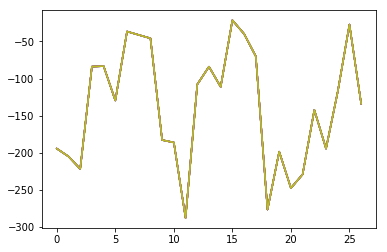

In [207]:
for temp in temps:
    for alpha in alphas:
        plt.plot(stack['{}'.format(temp)]['{}'.format(alpha)]['train_reward'])

In [174]:
def run_experiment (env,policy,gamma,alphas,temp,algo):
    print('Running Experient on: {}'.format(env))
    stack = {}
    
#     stack_episodic_reward1 = np.zeros(len(alphas))
#     stack_episodic_reward2 = np.zeros(len(alphas))
#     stack_episodic_reward3 = np.zeros(len(alphas))
    stack_episodic_reward = 0

    
    stack_eval_reward = 0

    
    for temp in temps:
        
        stack2={}
        
        for alpha in alphas:
                        
            eval_reward = []
            data = pd.DataFrame()
            for run in range (10):
                print('Running Experiment: {} with temp: {} and alpha: {}'.format(run, temp, alpha))

                if algo == 'Qlearning':
                    Qlearning = Agent(env,policy,gamma, temp, alpha=alpha, epsilon=0.1)
                    Qlearning.reset()
                    # episodic rewards = cumulative rewards 10 episodes 
                    # eval_reward = reward for single evaluation step
                    for segment in range(100):
                        episodic_rewards,Q = Qlearning.Qlearning(episodes=10)
                    eval_reward.append(Qlearning.eval_(episodes=1))

                elif algo == 'SARSA':
                    SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
                    SARSA.reset()
                    for segment in range(100):
                        episodic_rewards,Q = SARSA.SARSA(episodes=10)
                    eval_reward.append(SARSA.eval_(episodes=1))

                elif algo == 'Expected_SARSA':
                    Expected_SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
                    Expected_SARSA.reset()
                    for segment in range(100):        
                        episodic_rewards,Q = Expected_SARSA.Expected_SARSA(episodes=10)
                    eval_reward.append(Expected_SARSA.eval_(episodes=1))

                stack_eval_reward+=np.ar(eval_reward)
                stack_episodic_reward+=np.mean(episodic_rewards)

                data['train_reward'] = stack_episodic_reward
                data['eval_reward'] = stack_eval_reward
        
        stack2['{}'.format(alpha)]=data
    stack['{}'.format(temp)]=stack2


        

    
    return stack

In [169]:
def run_experiment (env,policy,gamma,alphas,temp):
    print('Running Experient on: {}'.format(env))
    stack = {}
    
    stack_episodic_reward1 = np.zeros(len(alphas))
    stack_episodic_reward2 = np.zeros(len(alphas))
    stack_episodic_reward3 = np.zeros(len(alphas))
    
    stack_eval_reward1 = 0
    stack_eval_reward2 = 0
    stack_eval_reward3 = 0

    for run in range (10):
        print('Running Experiment: {} with temp: {}'.format(run, temp))

        mean_episodic_reward1 = []
        mean_episodic_reward2 = []
        mean_episodic_reward3 = []
        eval_reward1 = []
        eval_reward2 = []
        eval_reward3 = []

        for alpha in alphas:
            
            Qlearning = Agent(env,policy,gamma, temp, alpha=alpha, epsilon=0.1)
            Qlearning.reset()
            SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
            SARSA.reset()
            Expected_SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
            Expected_SARSA.reset()

            for segment in range(100):
                # episodic rewards = cumulative rewards 10 episodes 
                # eval_reward = reward for single evaluation step
                episodic_rewards1,Q1 = Qlearning.Qlearning(episodes=10)
            eval_reward1.append(Qlearning.eval_(episodes=10))
            #print(eval_reward1)
            for segment in range(100):
                episodic_rewards2,Q2 = SARSA.SARSA(episodes=10)
            eval_reward2.append(SARSA.eval_(episodes=10))
            #print(eval_reward2)
            for segment in range(100):        
                episodic_rewards3,Q3 = Expected_SARSA.Expected_SARSA(episodes=10)
            eval_reward3.append(Expected_SARSA.eval_(episodes=10))
            #print(eval_reward3)
            # stack mean of last 10 training reward for different alpha
            mean_episodic_reward1.append(np.mean(episodic_rewards1))
            mean_episodic_reward2.append(np.mean(episodic_rewards2))
            mean_episodic_reward3.append(np.mean(episodic_rewards3))


        stack_episodic_reward1+=mean_episodic_reward1
        stack_episodic_reward2+=mean_episodic_reward2
        stack_episodic_reward3+=mean_episodic_reward3
        
        stack_eval_reward1+=np.mean(eval_reward1)
        stack_eval_reward2+=np.mean(eval_reward2)
        stack_eval_reward3+=np.mean(eval_reward3)


        
    stack['Qlearning'] = stack_episodic_reward1/(run+1)
    stack['SARSA'] = stack_episodic_reward2/(run+1)
    stack['Expected_SARSA'] = stack_episodic_reward3/(run+1)
    
    stack['Qeval']=stack_eval_reward1/(run+1)
    stack['Seval']=stack_eval_reward2/(run+1)
    stack['Expectedeval']=stack_eval_reward3/(run+1)
    
    return stack

In [175]:
alphas = [0.2, 0.6, 1]
gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
policy ='Boltzmann_Exploration'
temps = [0.1,0.5,1]
algo = 'Qlearning'
run_experiment (env,policy,gamma,alphas,temp,algo)

Running Experient on: <TimeLimit<TaxiEnv<Taxi-v2>>>
Running Experiment: 0 with temp: 0.1 and alpha: 0.2


Exception: Data must be 1-dimensional

In [170]:
#alphas = np.linspace(0.1,1,10)
alphas = [0.2, 0.6, 1]
gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#env = CliffWalkingEnv()
policy ='Boltzmann_Exploration'
temps = 0.5
results = run_experiment (env,policy,gamma,alphas,temps)

Running Experient on: <TimeLimit<TaxiEnv<Taxi-v2>>>
Running Experiment: 0 with temp: 0.5
Running Experiment: 1 with temp: 0.5
Running Experiment: 2 with temp: 0.5
Running Experiment: 3 with temp: 0.5


KeyboardInterrupt: 

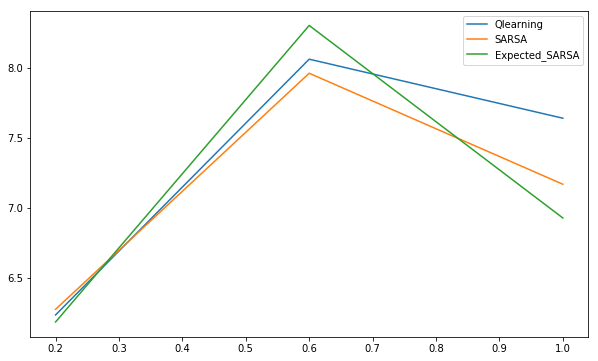

In [163]:
plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qlearning'], label='Qlearning')
plt.plot(alphas, results['SARSA'], label='SARSA')
plt.plot(alphas, results['Expected_SARSA'], label='Expected_SARSA')
plt.legend()
plt.show()

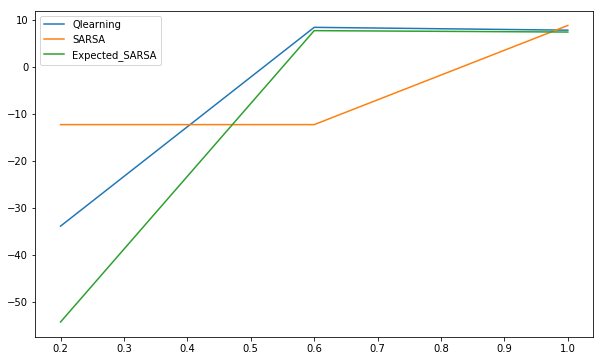

In [164]:
plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qeval'], label='Qlearning')
plt.plot(alphas, results['Seval'], label='SARSA')
plt.plot(alphas, results['Expectedeval'], label='Expected_SARSA')
plt.legend()
plt.show()


In [165]:
#alphas = np.linspace(0.1,1,10)
alphas = [0.2, 0.6, 1]
gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#env = CliffWalkingEnv()
policy ='Boltzmann_Exploration'
temps = 0.1
results = run_experiment (env,policy,gamma,alphas,temps)

Running Experient on: <TimeLimit<TaxiEnv<Taxi-v2>>>
Running Experiment: 0 with temp: 0.1
Running Experiment: 1 with temp: 0.1
Running Experiment: 2 with temp: 0.1
Running Experiment: 3 with temp: 0.1
Running Experiment: 4 with temp: 0.1
Running Experiment: 5 with temp: 0.1
Running Experiment: 6 with temp: 0.1
Running Experiment: 7 with temp: 0.1
Running Experiment: 8 with temp: 0.1
Running Experiment: 9 with temp: 0.1


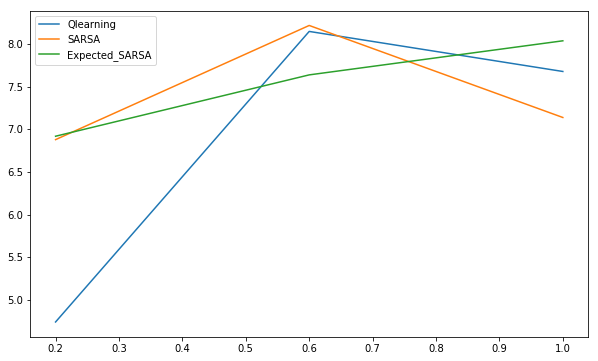

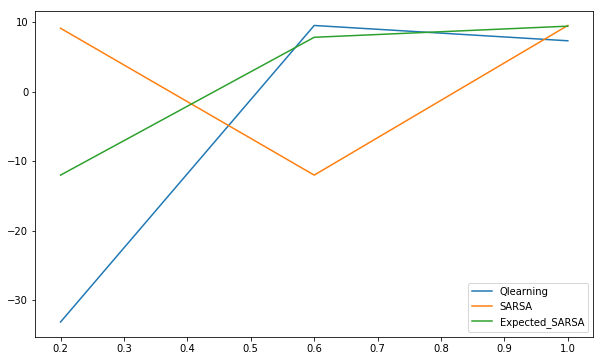

In [166]:
plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qlearning'], label='Qlearning')
plt.plot(alphas, results['SARSA'], label='SARSA')
plt.plot(alphas, results['Expected_SARSA'], label='Expected_SARSA')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qeval'], label='Qlearning')
plt.plot(alphas, results['Seval'], label='SARSA')
plt.plot(alphas, results['Expectedeval'], label='Expected_SARSA')
plt.legend()
plt.show()



In [167]:
#alphas = np.linspace(0.1,1,10)
alphas = [0.2, 0.6, 1]
gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#env = CliffWalkingEnv()
policy ='Boltzmann_Exploration'
temps = 1
results = run_experiment (env,policy,gamma,alphas,temps)

Running Experient on: <TimeLimit<TaxiEnv<Taxi-v2>>>
Running Experiment: 0 with temp: 1
Running Experiment: 1 with temp: 1
Running Experiment: 2 with temp: 1
Running Experiment: 3 with temp: 1
Running Experiment: 4 with temp: 1
Running Experiment: 5 with temp: 1
Running Experiment: 6 with temp: 1
Running Experiment: 7 with temp: 1
Running Experiment: 8 with temp: 1
Running Experiment: 9 with temp: 1


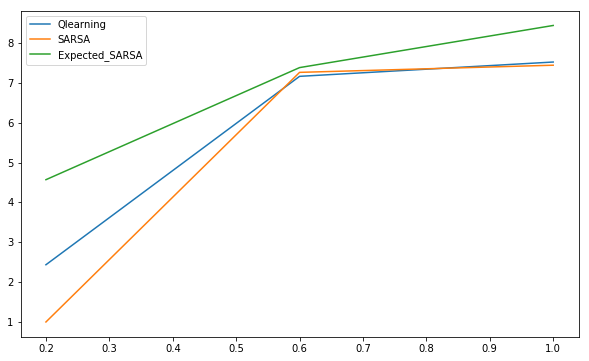

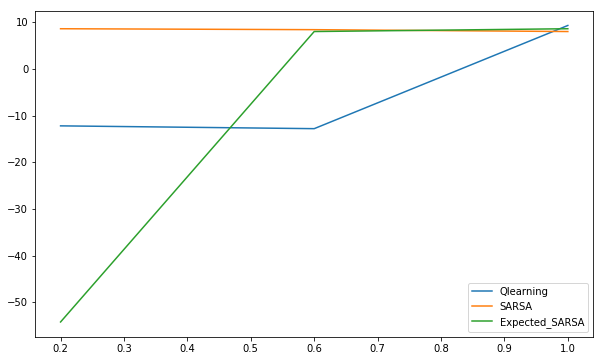

In [168]:
plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qlearning'], label='Qlearning')
plt.plot(alphas, results['SARSA'], label='SARSA')
plt.plot(alphas, results['Expected_SARSA'], label='Expected_SARSA')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(alphas, results['Qeval'], label='Qlearning')
plt.plot(alphas, results['Seval'], label='SARSA')
plt.plot(alphas, results['Expectedeval'], label='Expected_SARSA')
plt.legend()
plt.show()

############################################
Explaining Evaluation step to get the grpah:
############################################
According to the problem statement in the assignment - at each segment it requires one(1) evaluation of learnt policy after every ten(10) training episode. But as we're asked to report only the averge of final evaluation over 10 runs. So I computed only for the final evaluation as that's the only result requires for to report in the graph.

In [11]:
# plt.figure(figsize=(10,6))
# plt.plot(alphas, stack_episodic_reward1/3, label='Qlearning')
# plt.plot(alphas, stack_episodic_reward2/3, label='SARSA')
# plt.plot(alphas, stack_episodic_reward3/3, label='Expected_SARSA')
# plt.legend()
# plt.show()

In [12]:
# plt.figure(figsize=(10,6))
# plt.plot(alphas, mean_episodic_reward1, label='Qlearning')
# plt.plot(alphas, mean_episodic_reward2, label='SARSA')
# plt.plot(alphas, mean_episodic_reward3, label='Expected_SARSA')
# plt.legend()
# plt.show()

In [13]:
# alphas = np.linspace(0.1,1,10)
# gamma = 1  # disocunt factor
# #env = gym.make('Taxi-v2')
# env = CliffWalkingEnv()

# r_a1 = []
# r_a2 = []
# r_a3 = []
# policy ='Boltzmann_Exploration'
# temp = 0.5
# for alpha in alphas:
#     Qlearning = Agent(env,policy,gamma, temp, alpha=alpha, epsilon=0.1)
#     SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
#     Expected_SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
#     for i in range(100):
        
#         # episodic rewards = cumulative rewards 10 episodes 
#         # eval_reward = reward for single evaluation step
#         episodic_rewards1,Q1 = Qlearning.Qlearning(episodes=10)
#         eval_reward1 = Qlearning.eval(episodes=1)
        
#         episodic_rewards2,Q2 = SARSA.SARSA(episodes=10)
#         eval_reward2 = SARSA.eval(episodes=1)
        
#         episodic_rewards3,Q3 = Expected_SARSA.Expected_SARSA(episodes=10)
#         eval_reward3 = Expected_SARSA.eval(episodes=1)
    
#     r_a1.append(np.mean(reward1))
#     r_a2.append(np.mean(reward2))
#     r_a3.append(np.mean(reward3))

In [14]:
# plt.figure(figsize=(10,6))
# plt.plot(alphas, r_a1, label='Qlearning')
# plt.plot(alphas, r_a2, label='SARSA')
# plt.plot(alphas, r_a3, label='Expected_SARSA')
# plt.legend()
# plt.show()

In [119]:
# def plot_final_graph(total_rewards,alpha,temp,algo):
#     data = pd.DataFrame(total_rewards)
#     mean = data.T.mean(axis=1)
#     std = data.T.std(axis=1)
#     timestep = np.linspace(0,1000,1000)
#     fig = plt.figure(figsize=(10, 6))
#     ax = plt.subplot()
#     color = sns.color_palette('colorblind', n_colors=1)
#     plt.plot(timestep,mean,linewidth=1.5,  label=algo)
#     ax.fill_between(timestep,mean+std,mean-std,alpha=0.1,edgecolor=color, facecolor=color)
#     plt.ylim(-600,100)
#     x_label = 'Iterations'
#     y_label = 'Episodic Rewards'
#     title = ('for alpha: {} and temperature: {}').format(alpha,temp)   
#     ax.legend(loc='lower left', prop={'size' : 18})
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.set_title(title)
#     plt.legend()
#     plt.show()

In [117]:
def data_for_learning_curve(alpha,temp,algo):
    print('Algorithm: {}'.format(algo))
    #final_stack = {}
    gamma = 0.99  # disocunt factor
    env = gym.make('Taxi-v2')
    #total_rewards = pd.DataFrame()
    total_rewards = []
    policy ='Boltzmann_Exploration'
    for run in range(10):
        print('Running Experiment No: {}'.format(run))
        episodic_reward = []
        if algo == 'Qlearning':
            Qlearning = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
            episodic_reward,Q1 = Qlearning.Qlearning(episodes=1000)
         
            
        elif algo == 'SARSA':
            SARSA = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
            episodic_reward,Q1 = SARSA.SARSA(episodes=1000)
        
        elif algo == 'Expected_SARSA':
            Expected_SARSA = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
            episodic_reward,Q1 = Expected_SARSA.Expected_SARSA(episodes=1000)
        
        
        total_rewards.append(episodic_reward)
    
#     if algo == 'Qlearning': final_stack['Qlearning'] = total_rewards
#     elif algo == 'SARSA': final_stack['SARSA'] = total_rewards
#     elif algo == 'Expected_SARSA': final_stack['Expected_SARSA'] = total_rewards
    
    return total_rewards

In [144]:
def plot_final_graph(stack,alphas,temps,algos):
    colors = sns.color_palette('colorblind', n_colors=3)
    timestep = np.linspace(0,1000,1000)
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    for algo,color,alpha,temp in zip(algos,colors,alphas,temps):
        total_rewards = stack['{}'.format(algo)]
        data = pd.DataFrame(total_rewards).T.rolling(10, min_periods=10).mean()
        mean = data.mean(axis=1)
        std = data.std(axis=1)
        plt.plot(timestep,mean,color=color,linewidth=1.5, label='algo:{} | alpha:{} | temp:{}'.format(algo,alpha,temp)) 
        ax.fill_between(timestep,mean+std,mean-std,alpha=0.1,edgecolor=color, facecolor=color)
    plt.ylim(-600,100)
    x_label = 'Iterations'
    y_label = 'Episodic Rewards'
    #title = ('for alpha: {} and temperature: {}').format(alpha,temp)   
    ax.legend(loc='lower right', prop={'size' : 5})
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    #ax.set_title(title)
    plt.legend()
    plt.show()

In [123]:
alpha = np.array([0.6])
temp = 0.5
Q_data = data_for_learning_curve(alpha,temp,algo='Qlearning')

Algorithm: Qlearning
Running Experiment No: 0
Running Experiment No: 1
Running Experiment No: 2
Running Experiment No: 3
Running Experiment No: 4
Running Experiment No: 5
Running Experiment No: 6
Running Experiment No: 7
Running Experiment No: 8
Running Experiment No: 9


In [121]:
alpha = np.array([0.6])
temp = 1
S_data = data_for_learning_curve(alpha,temp,algo='SARSA')

Algorithm: SARSA
Running Experiment No: 0
Running Experiment No: 1
Running Experiment No: 2
Running Experiment No: 3
Running Experiment No: 4
Running Experiment No: 5
Running Experiment No: 6
Running Experiment No: 7
Running Experiment No: 8
Running Experiment No: 9


In [122]:
alpha = np.array([0.6])
temp = 0.1
ExpectedS_data = data_for_learning_curve(alpha,temp,algo='Expected_SARSA')

Algorithm: Expected_SARSA
Running Experiment No: 0
Running Experiment No: 1
Running Experiment No: 2
Running Experiment No: 3
Running Experiment No: 4
Running Experiment No: 5
Running Experiment No: 6
Running Experiment No: 7
Running Experiment No: 8
Running Experiment No: 9


In [124]:
final_stack = {}
final_stack['Qlearning'] = Q_data
final_stack['SARSA'] = S_data
final_stack['Expected_SARSA'] = ExpectedS_data

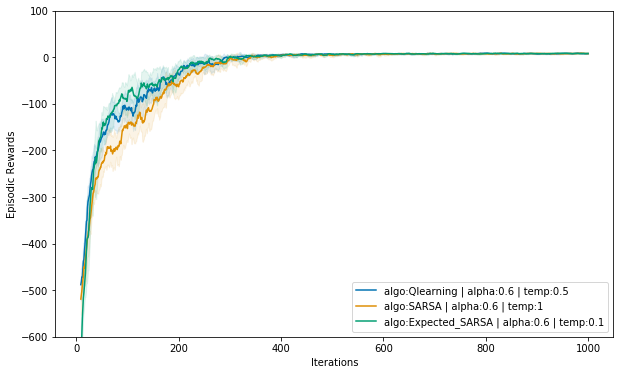

In [143]:
algos = ['Qlearning','SARSA','Expected_SARSA']
alphas =  np.array([0.6,0.6,0.6])
temps = [0.5,1,0.1]
plot_final_graph(final_stack,alphas,temps,algos)

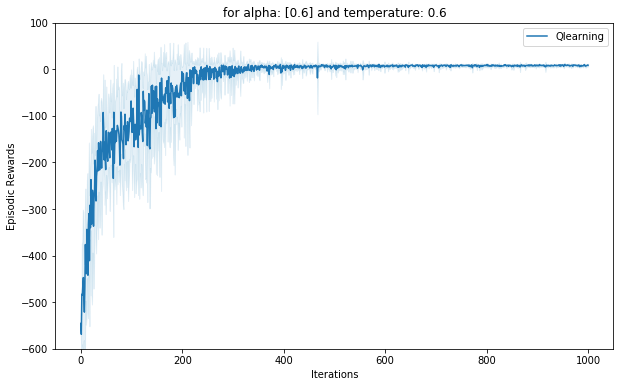

In [120]:
plot_final_graph(Q_data,alpha,temp,algo='Qlearning')

In [48]:
import pandas as pd
alpha = np.array([0.6])
temp = 0.6

gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#total_rewards = pd.DataFrame()
total_rewards = []
policy ='Boltzmann_Exploration'
for run in range(10):
    print('Running Experiment No: {}'.format(run))
    Qlearning = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
    #Qlearning.reset()
    episodic_reward,Q1 = Qlearning.Qlearning(episodes=1000)
    total_rewards.append(episodic_reward)



Running Experiment No: 0
Running Experiment No: 1
Running Experiment No: 2
Running Experiment No: 3
Running Experiment No: 4
Running Experiment No: 5
Running Experiment No: 6
Running Experiment No: 7
Running Experiment No: 8
Running Experiment No: 9


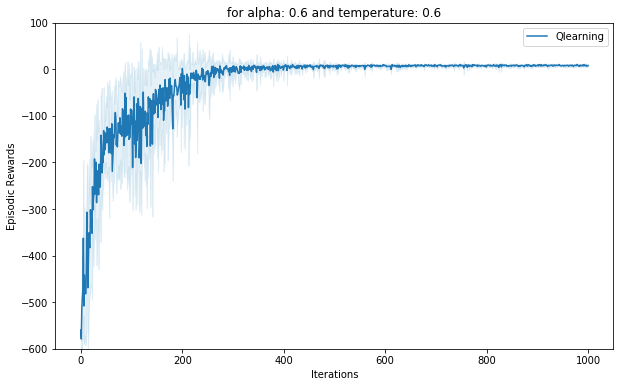

In [93]:
plot_final_graph(total_rewards, alpha[0],temp,policy_name='Qlearning')

In [94]:
import pandas as pd
alpha = np.array([0.6])
temp = 1

gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#total_rewards = pd.DataFrame()
total_rewards = []
policy ='Boltzmann_Exploration'
for run in range(10):
    print('Running Experiment No: {}'.format(run))
    SARSA = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
    #Qlearning.reset()
    episodic_reward,Q1 = SARSA.SARSA(episodes=1000)
    total_rewards.append(episodic_reward)

Running Experiment No: 0
Running Experiment No: 1
Running Experiment No: 2
Running Experiment No: 3
Running Experiment No: 4
Running Experiment No: 5
Running Experiment No: 6
Running Experiment No: 7
Running Experiment No: 8
Running Experiment No: 9


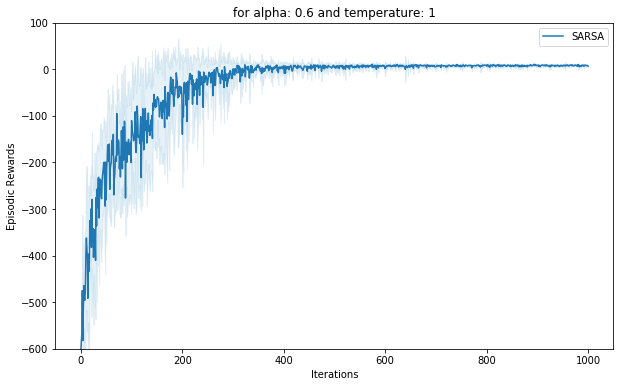

In [95]:
plot_final_graph(total_rewards, alpha[0],temp,policy_name='SARSA')

In [146]:
import pandas as pd
alpha = np.array([0.6])
temp = 0.6

gamma = 0.99  # disocunt factor
env = gym.make('Taxi-v2')
#total_rewards = pd.DataFrame()
total_rewards = []
policy ='Boltzmann_Exploration'

Qlearning = Agent(env,policy,gamma, temp, alpha, epsilon=0.1)    
#Qlearning.reset()
episodic_reward,Q1 = Qlearning.Qlearning(episodes=1000)

In [151]:
eval_reward = Qlearning.eval_(episodes=1)

In [154]:
np.array(eval_reward)

array([6])

In [ ]:
stack = {}

stack_episodic_reward1 = np.zeros(len(alphas))
stack_episodic_reward2 = np.zeros(len(alphas))
stack_episodic_reward3 = np.zeros(len(alphas))

stack_eval_reward1 = np.zeros(len(alphas))
stack_eval_reward2 = np.zeros(len(alphas))
stack_eval_reward3 = np.zeros(len(alphas))

for run in range (10):
    print('Running Experiment: {} with temp: {}'.format(run, temp))

    mean_episodic_reward1 = []
    mean_episodic_reward2 = []
    mean_episodic_reward3 = []
    eval_reward1 = []
    eval_reward2 = []
    eval_reward3 = []

    for alpha in alphas:

        Qlearning = Agent(env,policy,gamma, temp, alpha=alpha, epsilon=0.1)
        Qlearning.reset()
        SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
        SARSA.reset()
        Expected_SARSA = Agent(env, policy, gamma, temp, alpha=alpha, epsilon=0.1)
        Expected_SARSA.reset()

        for segment in range(100):
            # episodic rewards = cumulative rewards 10 episodes 
            # eval_reward = reward for single evaluation step
            episodic_rewards1,Q1 = Qlearning.Qlearning(episodes=10)
        eval_reward1.append(Qlearning.eval_(episodes=1))
        #print(eval_reward1)
        for segment in range(100):
            episodic_rewards2,Q2 = SARSA.SARSA(episodes=10)
        eval_reward2.append(SARSA.eval_(episodes=1))
        #print(eval_reward2)
        for segment in range(100):        
            episodic_rewards3,Q3 = Expected_SARSA.Expected_SARSA(episodes=10)
        eval_reward3.append(Expected_SARSA.eval_(episodes=1))
        #print(eval_reward3)
        # stack mean of last 10 training reward for different alpha
        mean_episodic_reward1.append(np.mean(episodic_rewards1))
        mean_episodic_reward2.append(np.mean(episodic_rewards2))
        mean_episodic_reward3.append(np.mean(episodic_rewards3))


    stack_episodic_reward1+=mean_episodic_reward1
    stack_episodic_reward2+=mean_episodic_reward2
    stack_episodic_reward3+=mean_episodic_reward3

    stack_eval_reward1+=np.array(eval_reward1)[0]
    stack_eval_reward2+=np.array(eval_reward2)[0]
    stack_eval_reward3+=np.array(eval_reward3)[0]



stack['Qlearning'] = stack_episodic_reward1/(run+1)
stack['SARSA'] = stack_episodic_reward2/(run+1)
stack['Expected_SARSA'] = stack_episodic_reward3/(run+1)

stack['Qeval']=stack_eval_reward1/(run+1)
stack['Seval']=stack_eval_reward2/(run+1)
stack['Expectedeval']=stack_eval_reward3/(run+1)